In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from ucimlrepo import fetch_ucirepo 
  

breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  

print(breast_cancer_wisconsin_original.metadata) 
  
print(breast_cancer_wisconsin_original.variables) 


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [7]:
print(X.shape)
print(y.shape)



(699, 9)
(699, 1)


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [9]:
X.head(5)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [10]:
X.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses'],
      dtype='object')

In [11]:
X.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.42,2.82,1.0,2.0,4.0,6.0,10.0
Uniformity_of_cell_size,699.0,3.13,3.05,1.0,1.0,1.0,5.0,10.0
Uniformity_of_cell_shape,699.0,3.21,2.97,1.0,1.0,1.0,5.0,10.0
Marginal_adhesion,699.0,2.81,2.86,1.0,1.0,1.0,4.0,10.0
Single_epithelial_cell_size,699.0,3.22,2.21,1.0,2.0,2.0,4.0,10.0
Bare_nuclei,683.0,3.54,3.64,1.0,1.0,1.0,6.0,10.0
Bland_chromatin,699.0,3.44,2.44,1.0,2.0,3.0,5.0,10.0
Normal_nucleoli,699.0,2.87,3.05,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.59,1.72,1.0,1.0,1.0,1.0,10.0


In [12]:
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


array([[<Axes: title={'center': 'Clump_thickness'}>,
        <Axes: title={'center': 'Uniformity_of_cell_size'}>,
        <Axes: title={'center': 'Uniformity_of_cell_shape'}>],
       [<Axes: title={'center': 'Marginal_adhesion'}>,
        <Axes: title={'center': 'Single_epithelial_cell_size'}>,
        <Axes: title={'center': 'Bare_nuclei'}>],
       [<Axes: title={'center': 'Bland_chromatin'}>,
        <Axes: title={'center': 'Normal_nucleoli'}>,
        <Axes: title={'center': 'Mitoses'}>]], dtype=object)

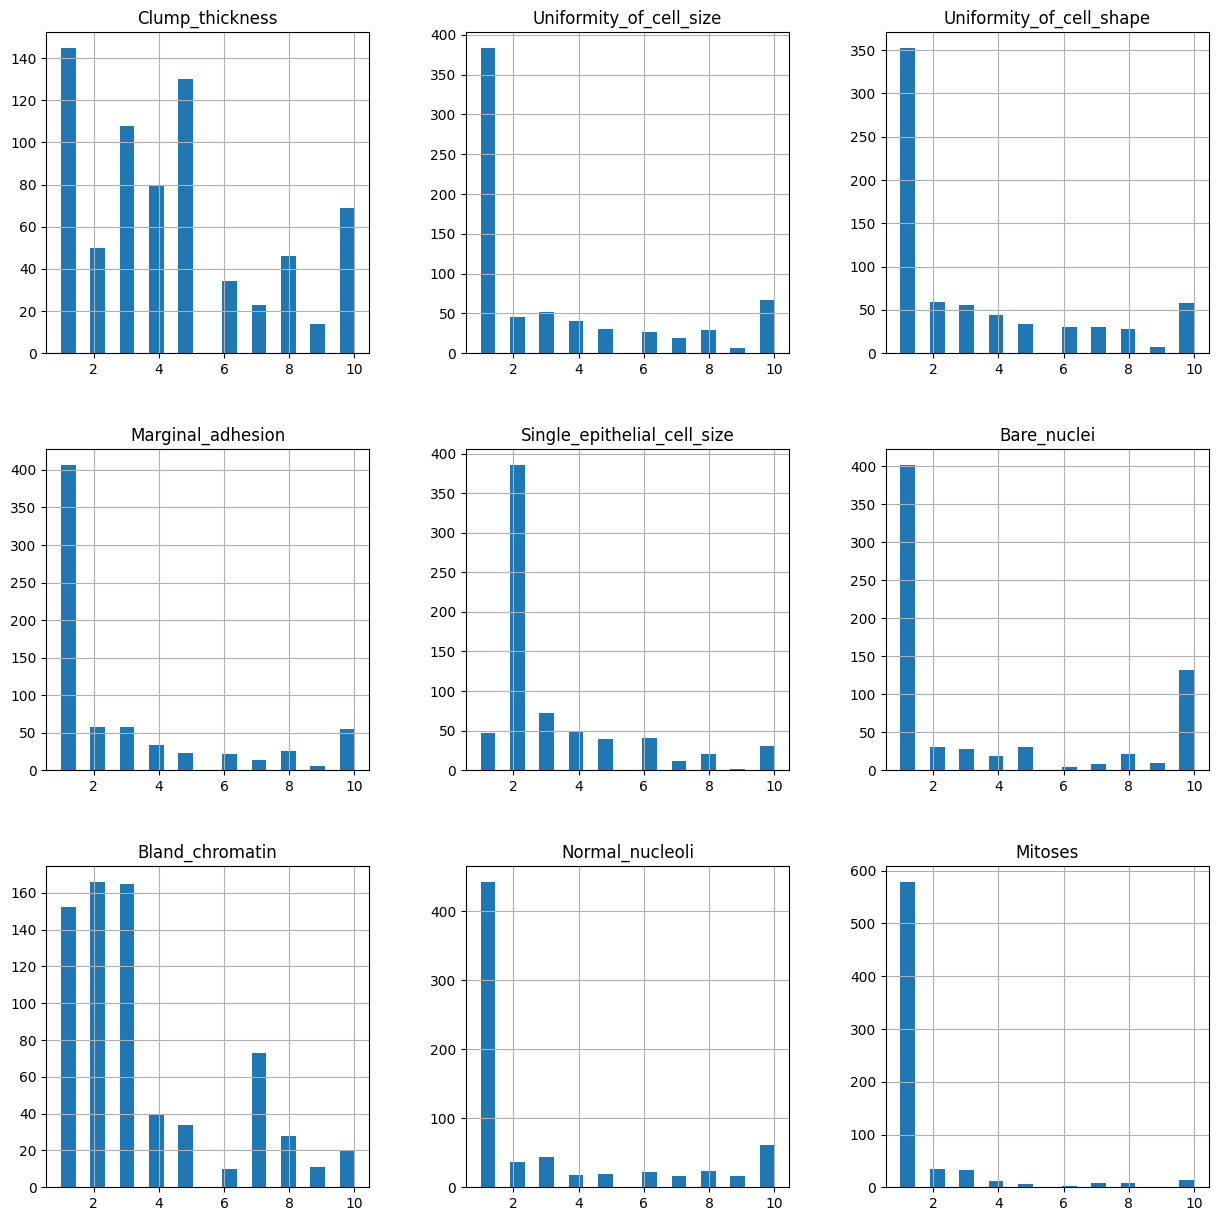

In [13]:
X.hist(bins=20, figsize=(15, 15))

In [14]:
#replacing y with 0 and 1

new_y =  y.replace({2: 0, 4: 1})

print(new_y.head(20))

print('Unique Values in y:', np.unique(new_y))

    Class
0       0
1       0
2       0
3       0
4       0
5       1
6       0
7       0
8       0
9       0
10      0
11      0
12      1
13      0
14      1
15      1
16      0
17      0
18      1
19      0
Unique Values in y: [0 1]


array([[<Axes: title={'center': 'Class'}>]], dtype=object)

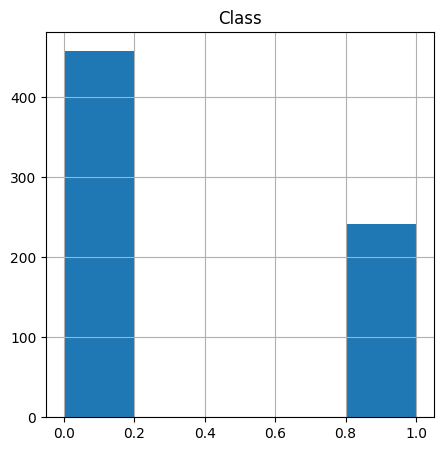

In [15]:
new_y.hist(bins=5, figsize=(5, 5))

In [16]:
#Missing Values

print(X.isnull().sum().sort_values(ascending=False).to_string())

Bare_nuclei                    16
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0


In [17]:
#Removing Missing Values

X_clean = X.dropna() 
y_clean = y.loc[X_clean.index]

print(X_clean.isnull().sum())

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64


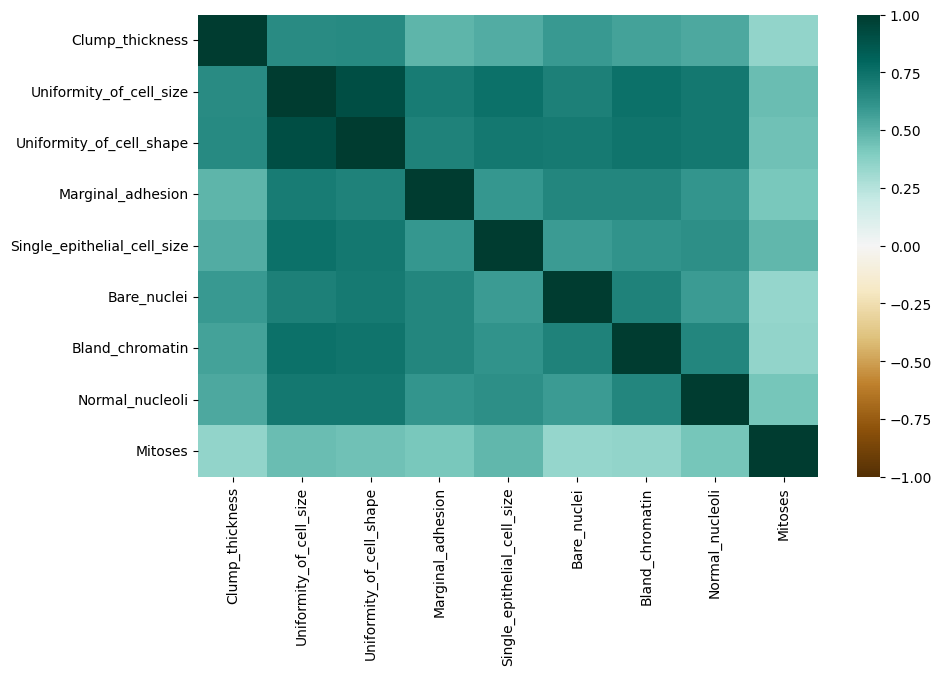

In [18]:
corr=X.corr()

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap='BrBG')

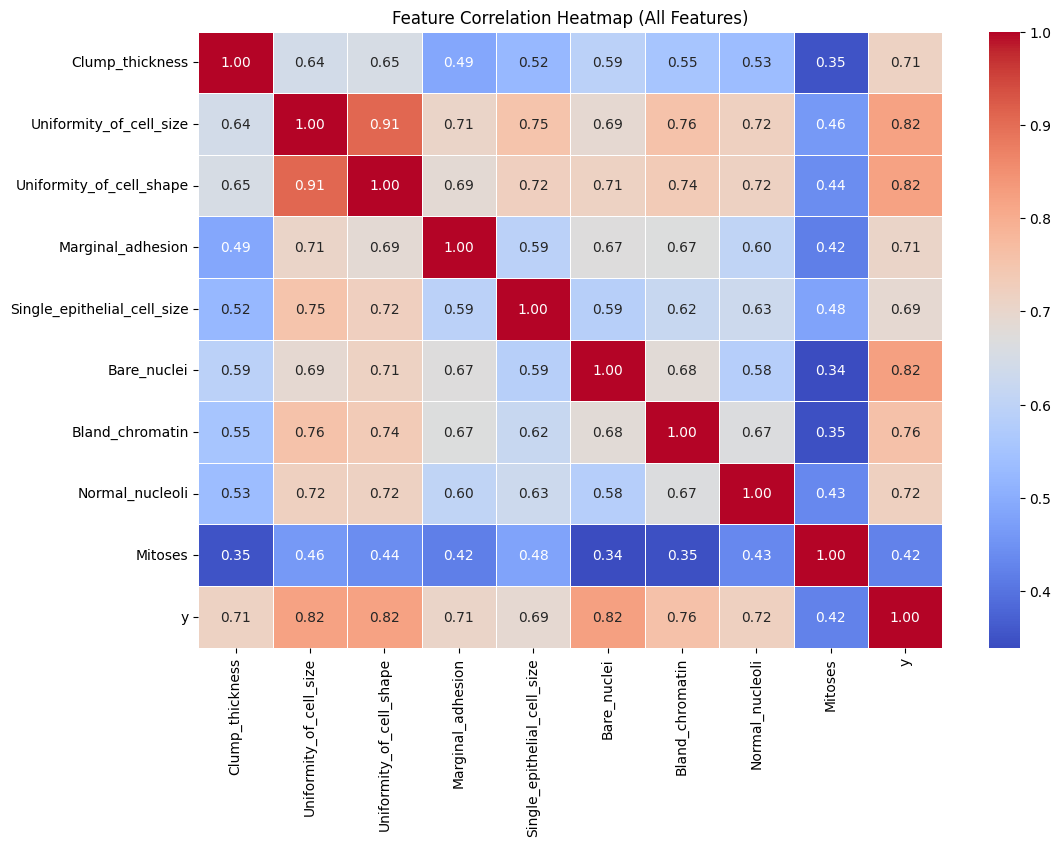

In [19]:
data_clean = X_clean.copy()
data_clean["y"] = y_clean 
corr_matrix = data_clean.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (All Features)")
plt.show()

In [20]:
#Splitting Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.25, random_state=7)

print('Shape of training data :',X_train.shape)
print('Shape of testing data :',y_test.shape)

Shape of training data : (512, 9)
Shape of testing data : (171, 1)


In [21]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

model = GaussianNB()
model.fit(X_train,y_train)

predict_train = model.predict(X_train)
print('\nTarget on train data:\n',predict_train) 

accuracy_train = accuracy_score(y_train,predict_train)
print('\nAccuracy score on train dataset : ', accuracy_train)

predict_test = model.predict(X_test)
print('\nTarget on test data:\n',predict_test) 

accuracy_test = accuracy_score(y_test,predict_test)
print('\nAccuracy Score on test dataset : ', accuracy_test)


Target on train data:
 [2 2 4 4 2 2 2 2 2 2 4 4 4 2 2 4 2 4 2 2 2 2 4 2 4 4 2 2 2 2 4 4 4 2 4 2 2
 4 4 2 4 4 2 4 4 2 2 4 2 2 4 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 4 2 4 4 2 4 4 4 4 2 4 4 4 2 2 4 2 2 2 4 2 2 4 2 2 2 2
 4 2 2 2 2 2 4 2 2 2 4 2 4 2 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 4
 4 4 2 2 2 4 2 4 2 2 4 4 2 4 2 2 2 2 2 2 4 2 2 4 2 2 2 4 4 2 2 2 2 2 2 4 2
 2 2 4 4 4 2 4 4 2 2 2 4 2 2 4 4 2 2 4 2 2 4 2 2 2 4 4 4 2 2 4 4 2 4 2 4 4
 2 2 2 2 4 2 2 2 2 2 4 4 2 2 2 2 2 2 4 4 2 2 2 2 2 2 4 4 2 2 4 2 2 4 2 2 2
 2 4 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 4 4 2 4 4 2 2 4 2 2 2 2 4 4 2
 2 4 2 4 2 2 2 2 4 2 4 2 4 2 4 2 4 2 4 2 4 4 2 2 4 2 2 2 2 4 2 2 4 4 2 4 4
 2 2 2 4 2 2 2 4 2 4 4 2 4 2 2 2 4 2 2 2 4 2 2 2 2 2 4 4 2 4 4 4 4 2 2 2 2
 2 2 4 4 2 4 2 2 4 4 2 4 4 4 2 2 2 4 4 4 2 4 2 2 2 2 4 4 2 4 4 4 2 2 2 2 2
 2 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 4 4 4 4 4 2 2 4 4 4 4 2 4 2 2 4 2 2 4
 2 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4
 

[[105   4]
 [  0  62]]


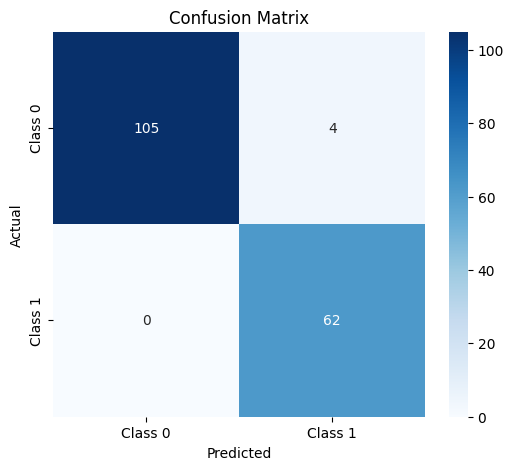

In [22]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
import pickle

# Save the trained model as a pickle file
with open("../naive_bayes_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("\nModel saved as naive_bayes_model.pkl!")


Model saved as naive_bayes_model.pkl!
